
#Descargar e importar los archivos de 500 pacientes

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array
from keras import models, layers
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
image_dir = '/content/drive/MyDrive/CICLO 2024-1/Patrones/Challenge/base_datos/p10'

In [4]:
data_chex=pd.read_csv('mimic-cxr-2.0.0-chexpert.csv')
data_chex

subject_id  study_id  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0         10000032  50414267          NaN           NaN            NaN    NaN   
1         10000032  53189527          NaN           NaN            NaN    NaN   
2         10000032  53911762          NaN           NaN            NaN    NaN   
3         10000032  56699142          NaN           NaN            NaN    NaN   
4         10000764  57375967          NaN           NaN            1.0    NaN   
...            ...       ...          ...           ...            ...    ...   
227822    19999442  58708861          NaN           NaN            NaN    NaN   
227823    19999733  57132437          NaN           NaN            NaN    NaN   
227824    19999987  55368167          1.0          -1.0            NaN    NaN   
227825    19999987  58621812          1.0           NaN            NaN    NaN   
227826    19999987  58971208          1.0           NaN            NaN    NaN   

        Enlarged Cardiomediastinum  Fracture  Lung Lesion  Lung Opacity  \
0                              NaN       NaN          NaN           NaN   
1                              NaN       NaN          NaN           NaN   
2                              NaN       NaN          NaN           NaN   
3                              NaN       NaN          NaN           NaN   
4                              NaN       NaN          NaN           NaN   
...                            ...       ...          ...           ...   
227822                         NaN       NaN          NaN           NaN   
227823                         NaN       NaN          NaN           NaN   
227824                         NaN       NaN          0.0           NaN   
227825                         NaN       NaN          NaN           NaN   
227826                         NaN       NaN          NaN           NaN   

        No Finding  Pleural Effusion  Pleural Other  Pneumonia  Pneumothorax  \
0              1.0               NaN            NaN        NaN           NaN   
1              1.0               NaN            NaN        NaN           NaN   
2              1.0               NaN            NaN        NaN           NaN   
3              1.0               NaN            NaN        NaN           NaN   
4              NaN               NaN            NaN       -1.0           NaN   
...            ...               ...            ...        ...           ...   
227822         1.0               NaN            NaN        NaN           NaN   
227823         1.0               NaN            NaN        NaN           NaN   
227824         NaN               0.0            NaN        NaN           0.0   
227825         NaN               NaN            NaN        NaN           NaN   
227826         NaN               NaN            NaN        NaN           NaN   

        Support Devices  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
...                 ...  
227822              1.0  
227823              NaN  
227824              NaN  
227825              1.0  
227826              NaN  

[227827 rows x 16 columns]

In [5]:
#Utilizare los primeros 500 subject_id

valores_sub_id=data_chex['subject_id'].unique()

segmento=valores_sub_id[:500]
segmento

array([10000032, 10000764, 10000898, 10000935, 10000980, 10001038,
       10001122, 10001176, 10001217, 10001401, 10001851, 10001884,
       10002013, 10002131, 10002157, 10002177, 10002221, 10002428,
       10002430, 10002557, 10002559, 10002661, 10002804, 10002930,
       10003019, 10003052, 10003255, 10003299, 10003400, 10003412,
       10003502, 10003637, 10003956, 10004235, 10004322, 10004457,
       10004720, 10004749, 10005001, 10005024, 10005329, 10005368,
       10005749, 10005858, 10005866, 10006023, 10006431, 10006457,
       10006501, 10006692, 10007058, 10007134, 10007326, 10007795,
       10007920, 10007928, 10008064, 10008179, 10008304, 10008493,
       10008816, 10008922, 10009049, 10009614, 10010150, 10010231,
       10010253, 10010440, 10010471, 10010635, 10010638, 10010867,
       10010920, 10010961, 10011126, 10011169, 10011365, 10011466,
       10011607, 10011668, 10011855, 10011938, 10012261, 10012292,
       10012438, 10012498, 10012569, 10012768, 10012853, 10013

In [6]:
len(segmento)

500

#Extraer los diagnosticos por cada subject_id

In [7]:
frames=[]
indices=segmento
for indice in indices:
  fila = data_chex[data_chex['subject_id'] == indice]
  frames.append(fila)  # Agrega la fila extraída a la lista

# Usando concat para combinar todas las filas en un nuevo DataFrame
data_use = pd.concat(frames)

data_use

subject_id  study_id  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0       10000032  50414267          NaN           NaN            NaN    NaN   
1       10000032  53189527          NaN           NaN            NaN    NaN   
2       10000032  53911762          NaN           NaN            NaN    NaN   
3       10000032  56699142          NaN           NaN            NaN    NaN   
4       10000764  57375967          NaN           NaN            1.0    NaN   
...          ...       ...          ...           ...            ...    ...   
1793    10078115  58448677          NaN           NaN            NaN    NaN   
1794    10078115  58810728          NaN           NaN            1.0    1.0   
1795    10078115  59562487          NaN           1.0            NaN    1.0   
1796    10078115  59919639          1.0           1.0            NaN    1.0   
1797    10078297  57167962          NaN           1.0            NaN    0.0   

      Enlarged Cardiomediastinum  Fracture  Lung Lesion  Lung Opacity  \
0                            NaN       NaN          NaN           NaN   
1                            NaN       NaN          NaN           NaN   
2                            NaN       NaN          NaN           NaN   
3                            NaN       NaN          NaN           NaN   
4                            NaN       NaN          NaN           NaN   
...                          ...       ...          ...           ...   
1793                         NaN       NaN          NaN           NaN   
1794                         NaN       NaN          NaN           NaN   
1795                         NaN       NaN          NaN           NaN   
1796                         NaN       NaN          NaN           1.0   
1797                         NaN       NaN          NaN           NaN   

      No Finding  Pleural Effusion  Pleural Other  Pneumonia  Pneumothorax  \
0            1.0               NaN            NaN        NaN           NaN   
1            1.0               NaN            NaN        NaN           NaN   
2            1.0               NaN            NaN        NaN           NaN   
3            1.0               NaN            NaN        NaN           NaN   
4            NaN               NaN            NaN       -1.0           NaN   
...          ...               ...            ...        ...           ...   
1793         1.0               NaN            NaN        NaN           NaN   
1794         NaN              -1.0            NaN        1.0           NaN   
1795         NaN               NaN            NaN        NaN           NaN   
1796         NaN               1.0            NaN        NaN           NaN   
1797         NaN               NaN            NaN        NaN           NaN   

      Support Devices  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
1793              1.0  
1794              1.0  
1795              1.0  
1796              1.0  
1797              NaN  

[1798 rows x 16 columns]

#Realizo EDA

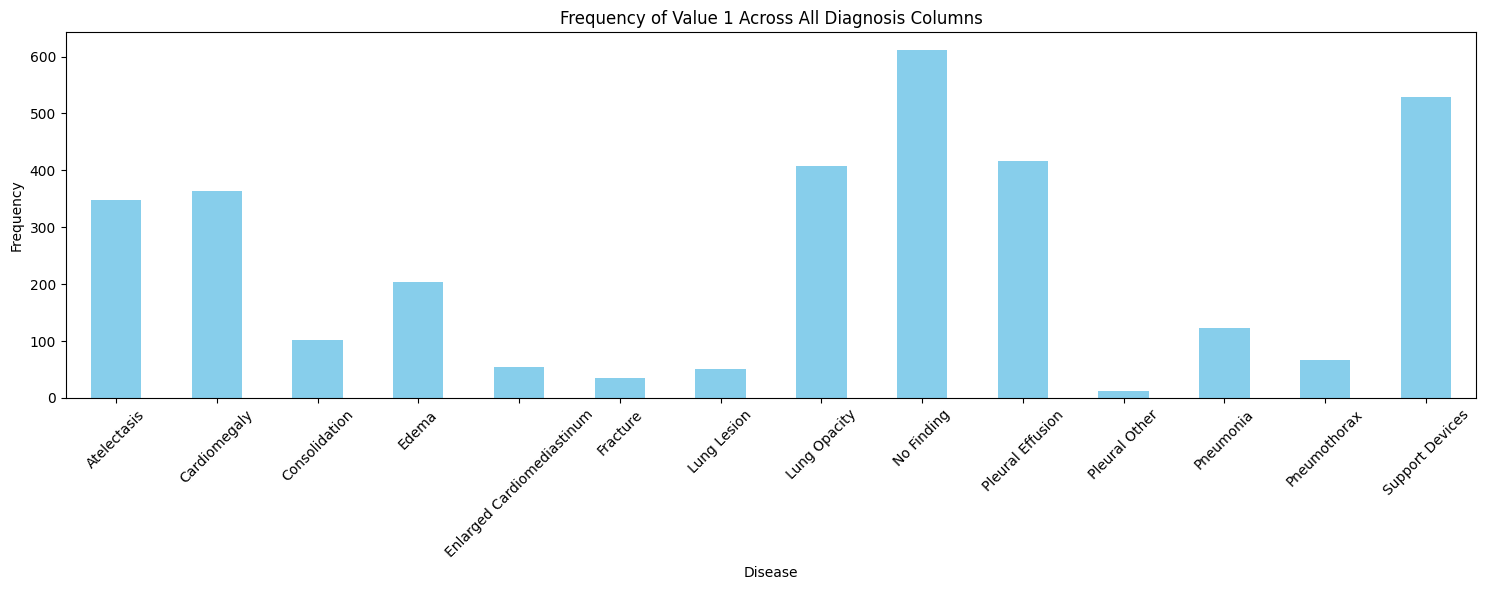

In [8]:

# Filter the DataFrame to include only rows where the value is 1 in each diagnosis column
diagnosis_columns = data_use.drop(['subject_id', 'study_id'], axis=1)
diagnosis_columns_one = diagnosis_columns.eq(1)

# Calculate total frequency of 1 across all columns
total_frequency_counts = diagnosis_columns_one.sum()

# Plot histogram
plt.figure(figsize=(15, 6))
total_frequency_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Value 1 Across All Diagnosis Columns')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
data_use2=data_use.drop(['Consolidation', 'Fracture','Pleural Other','Lung Lesion','Enlarged Cardiomediastinum','Pneumonia','Pneumothorax','No Finding'], axis=1)

In [10]:
#En cada ID tengo que ver que tipo de molecula tiene, por ello, usare la transpuesta del dataframe
#columnas_a_utilizar = ['Atelectasis', 'Cardiomegaly', 'Consolidation','Edema', 'Enlarged Cardiomediastinum', 'Fracture','Lung Lesion','Lung Opacity','No Finding','Pleural Effusion','Pleural Other','Pneumonia','Pneumothorax','Support Devices']
columnas_a_eliminar = ['subject_id','study_id']
# Eliminar las columnas
data = data_use2.drop(columnas_a_eliminar, axis=1)
data1=data.T
data1
#data1[0]

0     1     2     3     4     5     6     7     8     9     \
Atelectasis        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Cardiomegaly       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Edema              NaN   NaN   NaN   NaN   NaN   NaN   NaN  -1.0   NaN   NaN   
Lung Opacity       NaN   NaN   NaN   NaN   NaN   NaN   NaN  -1.0   1.0   NaN   
Pleural Effusion   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
Support Devices    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                  ...  1788  1789  1790  1791  1792  1793  1794  1795  1796  \
Atelectasis       ...   NaN   1.0   1.0   1.0   1.0   NaN   NaN   NaN   1.0   
Cardiomegaly      ...   1.0  -1.0   1.0   1.0   1.0   NaN   NaN   1.0   1.0   
Edema             ...   1.0   1.0   NaN   NaN  -1.0   NaN   1.0   1.0   1.0   
Lung Opacity      ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   
Pleural Effusion  ...  -1.0   NaN   NaN   0.0   1.0   NaN  -1.0   NaN   1.0   
Support Devices   ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

                  1797  
Atelectasis        NaN  
Cardiomegaly       1.0  
Edema              0.0  
Lung Opacity       NaN  
Pleural Effusion   NaN  
Support Devices    NaN  

[6 rows x 1798 columns]

In [11]:
#utilizo un bucle para analizar cada columna que sera un ID en un bucle
#Dentro del bucle bucle busco que en que posiciones(index) se encuentran los valores diferentes de 0 que implica que tiene esa molecula
#Los tipos de moleculas se colocarán en un lista, en la cual cada fila será el ID  correspondiente
lista=[]
for i in range(0,1797):
  val=data1[i] == 1
  result=data1[i][val]
  tipo=result.index
  info=tipo.tolist()
  valu=''
  if len(info) > 0:
      for val in info:
          valu = valu + " " +val
      info= [valu]
  lista.append(info)

#Aqui convierto la lista en un dataframe para unirlo con el dataframe de df1
df = pd.DataFrame(lista, columns=['Tipo'])
d0 = data_use[['subject_id', 'study_id']].copy()
df_new=pd.concat([d0,df],axis=1)
df_new


subject_id  study_id                                               Tipo
0       10000032  50414267                                               None
1       10000032  53189527                                               None
2       10000032  53911762                                               None
3       10000032  56699142                                               None
4       10000764  57375967                                               None
...          ...       ...                                                ...
1793    10078115  58448677                                    Support Devices
1794    10078115  58810728                              Edema Support Devices
1795    10078115  59562487                 Cardiomegaly Edema Support Devices
1796    10078115  59919639   Atelectasis Cardiomegaly Edema Lung Opacity P...
1797    10078297  57167962                                                NaN

[1798 rows x 3 columns]

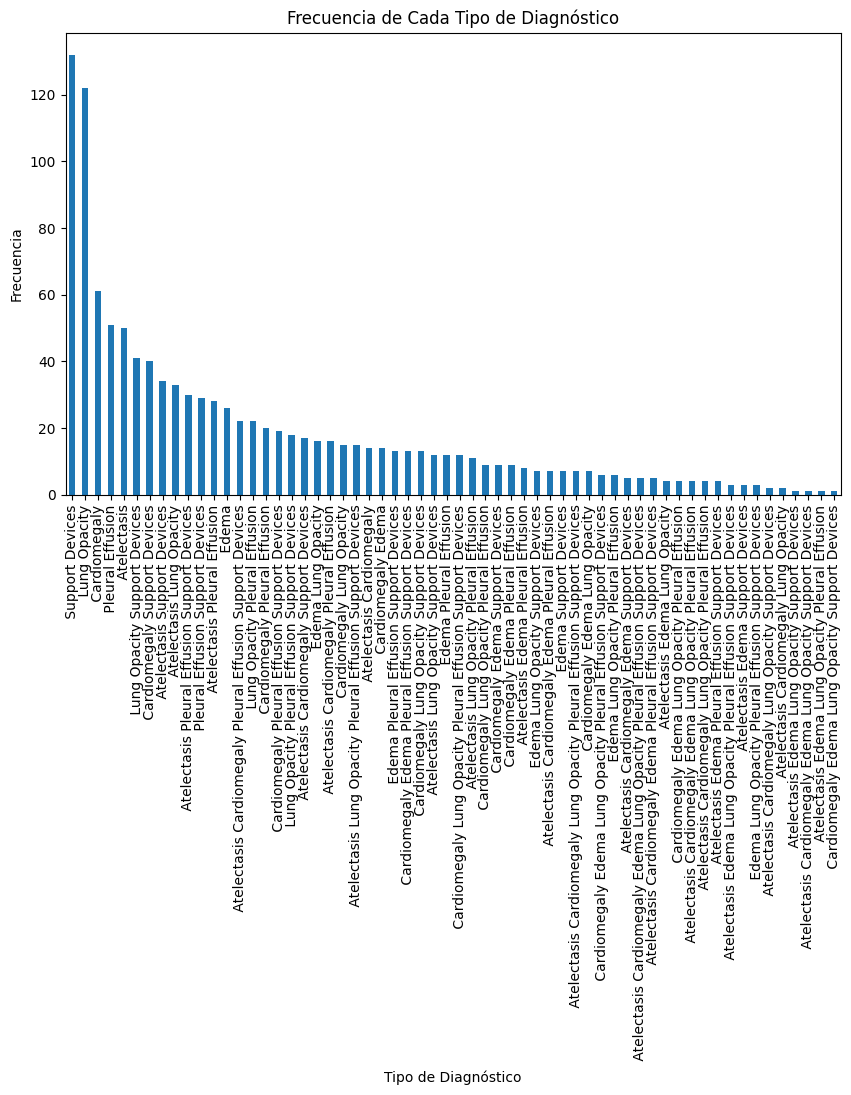

In [12]:

plt.figure(figsize=(10, 6))
df_new['Tipo'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Cada Tipo de Diagnóstico')
plt.xlabel('Tipo de Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
clases=[' Support Devices',' Lung Opacity',' Cardiomegaly',' Pleural Effusion',' Atelectasis',' Lung Opacity Support Devices',' Atelectasis Support Devices']

# Eliminar filas con valores nulos en la columna 'Tipo'
df_new = df_new.dropna(subset=['Tipo'])

# Filtrar las filas que tienen las clases especificadas
data_use2 = df_new[df_new['Tipo'].isin(clases)]

# Mostrar el DataFrame resultante
data_use2

subject_id  study_id                          Tipo
7       10000935  50578979              Pleural Effusion
8       10000935  51178377                  Lung Opacity
10      10000935  56164612                  Lung Opacity
18      10000980  57861150              Pleural Effusion
21      10000980  59988438              Pleural Effusion
...          ...       ...                           ...
1765    10076958  59180098   Atelectasis Support Devices
1781    10078115  51073410   Atelectasis Support Devices
1783    10078115  51751845               Support Devices
1787    10078115  52481083               Support Devices
1793    10078115  58448677               Support Devices

[491 rows x 3 columns]

In [14]:
# Convertir los diagnósticos a categorías numéricas
diagnostico_mapping ={' Support Devices': 1,' Lung Opacity': 2,' Cardiomegaly': 3,' Pleural Effusion': 4,' Atelectasis': 5,' Lung Opacity Support Devices': 6,' Atelectasis Support Devices': 0}

df_diagnosis=data_use2.copy()

# Aplicar el mapeo a la columna 'Tipo' del DataFrame
df_diagnosis['Tipo'] = df_diagnosis['Tipo'].map(diagnostico_mapping)

# Mostrar el DataFrame resultante
df_diagnosis


subject_id  study_id  Tipo
7       10000935  50578979     4
8       10000935  51178377     2
10      10000935  56164612     2
18      10000980  57861150     4
21      10000980  59988438     4
...          ...       ...   ...
1765    10076958  59180098     0
1781    10078115  51073410     0
1783    10078115  51751845     1
1787    10078115  52481083     1
1793    10078115  58448677     1

[491 rows x 3 columns]

#Preprocesar y almacenar las imagenes de los study_id obtenidos

In [15]:
image_dir = '/content/drive/MyDrive/CICLO 2024-1/Patrones/Challenge/base_datos/p10'

In [16]:
import cv2
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = img_to_array(image) / 255.0  # Normalizar
    return image

In [17]:
# Obtener los study_id necesarios del DataFrame df_diagnosis
study_id_necesarios = df_diagnosis['study_id']

# Diccionario para almacenar las rutas de las imágenes agrupadas por study_id
imagenes_por_study_id = {}

# Recorrer las carpetas de imágenes
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith('.jpg'):
            # Obtener el subject_id y el study_id de la ruta de la imagen
            parts = root.split('/')
            subject_id = int(parts[-2][1:])  # Obtener el subject_id desde la penúltima parte de la ruta
            study_id = int(parts[-1][1:])  # Obtener el study_id desde la última parte de la ruta

            # Verificar si el study_id está en los study_id necesarios
            if study_id in study_id_necesarios.values:
                # Almacenar la ruta de la imagen en el diccionario según su study_id
                if study_id not in imagenes_por_study_id:
                    imagenes_por_study_id[study_id] = []
                path = os.path.join(root, file)
                imagenes_por_study_id[study_id].append(load_and_preprocess_image(path))

# Ahora imagenes_por_study_id contendrá solo las rutas de las imágenes correspondientes a los study_id necesarios.


In [18]:
imagenes_por_study_id

{59162519: [array([[[0.02745098, 0.02745098, 0.02745098],
          [0.04313726, 0.04313726, 0.04313726],
          [0.04313726, 0.04313726, 0.04313726],
          ...,
          [0.07843138, 0.07843138, 0.07843138],
          [0.07843138, 0.07843138, 0.07843138],
          [0.07843138, 0.07843138, 0.07843138]],
  
         [[0.02745098, 0.02745098, 0.02745098],
          [0.03529412, 0.03529412, 0.03529412],
          [0.04705882, 0.04705882, 0.04705882],
          ...,
          [0.06666667, 0.06666667, 0.06666667],
          [0.06666667, 0.06666667, 0.06666667],
          [0.06666667, 0.06666667, 0.06666667]],
  
         [[0.03529412, 0.03529412, 0.03529412],
          [0.04313726, 0.04313726, 0.04313726],
          [0.03137255, 0.03137255, 0.03137255],
          ...,
          [0.05490196, 0.05490196, 0.05490196],
          [0.05490196, 0.05490196, 0.05490196],
          [0.05490196, 0.05490196, 0.05490196]],
  
         ...,
  
         [[0.05490196, 0.05490196, 0.05490196],
    

In [19]:
len(imagenes_por_study_id)

491

In [20]:
# Crear un diccionario para almacenar las imagenes agrupadas por study_id en el orden del df_diagnosis original
imagenes_por_study_id_ordenado = {}

# Iterar sobre las filas del DataFrame original
for index, row in df_diagnosis.iterrows():
    study_id = row['study_id']
    if study_id in imagenes_por_study_id:
        # Almacenar las rutas de las imágenes en el nuevo diccionario
        imagenes_por_study_id_ordenado[study_id] = imagenes_por_study_id.get(study_id)
imagenes_por_study_id_ordenado

{50578979: [array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]

In [21]:
len(imagenes_por_study_id_ordenado)

491

In [22]:
imagenes_por_study_id_ordenado

{50578979: [array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]

In [23]:
#Usar si es que se guardo las rutas
#Imprimir las rutas de las imágenes agrupadas por study_id en el nuevo diccionario
#for study_id, rutas_imagenes in imagenes_por_study_id_ordenado.items():
#    print(f'Study ID: {study_id}')
#    for ruta_imagen in rutas_imagenes:
#        print(f'   {ruta_imagen}')

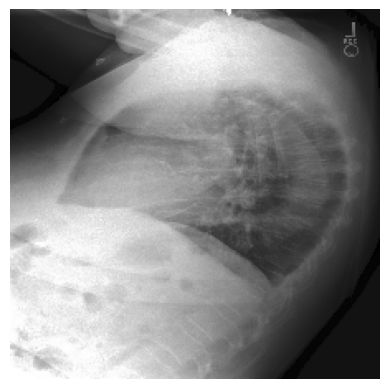

In [24]:
val=imagenes_por_study_id_ordenado[57861150][0]
#val
plt.imshow(val)
plt.axis('off')
plt.show()

In [25]:
val.shape

(224, 224, 3)

In [26]:
#imagenes_por_study_id_ordenado

#Construir y entrenar el modelo

In [ ]:
#selecciona las imagenes con los codigos study_id que se usaran


In [ ]:
# Prepararo los datos
imagenes = []
etiquetas = []

for study_id, imagenes_array in imagenes_por_study_id_ordenado.items():
    if study_id in df_diagnosis['study_id'].values:
        diagnostico = df_diagnosis[df_diagnosis['study_id'] == study_id]['Tipo'].values[0]
        for imagen in imagenes_array:
            imagenes.append(imagen)
            etiquetas.append(diagnostico)

imagenes = np.array(imagenes)
etiquetas = to_categorical(np.array(etiquetas))

In [ ]:
np.shape(imagenes)

(747, 224, 224, 3)

In [ ]:
np.shape(etiquetas)

(747, 7)

In [ ]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

# Define el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(diagnostico_mapping), activation='softmax')
])

# Compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Entrena el modelo
modelb0=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
19/19 [==============================] - 67s 3s/step - loss: 2.5708 - accuracy: 0.2429 - val_loss: 1.9179 - val_accuracy: 0.2267
Epoch 2/10
19/19 [==============================] - 60s 3s/step - loss: 1.7841 - accuracy: 0.3250 - val_loss: 1.8710 - val_accuracy: 0.2333
Epoch 3/10
19/19 [==============================] - 58s 3s/step - loss: 1.6853 - accuracy: 0.3568 - val_loss: 1.8980 - val_accuracy: 0.2867
Epoch 4/10
19/19 [==============================] - 63s 3s/step - loss: 1.4961 - accuracy: 0.4523 - val_loss: 2.1240 - val_accuracy: 0.2667
Epoch 5/10
19/19 [==============================] - 66s 3s/step - loss: 1.1489 - accuracy: 0.5829 - val_loss: 2.1279 - val_accuracy: 0.2667
Epoch 6/10
19/19 [==============================] - 65s 3s/step - loss: 0.7498 - accuracy: 0.7471 - val_loss: 2.3574 - val_accuracy: 0.2800
Epoch 7/10
19/19 [==============================] - 64s 3s/step - loss: 0.4815 - accuracy: 0.8509 - val_loss: 2.6966 - val_accuracy: 0.3133
Epoch 8/10
19/19 [==

In [ ]:
# Evalúa el modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

#Evaluar el modelo

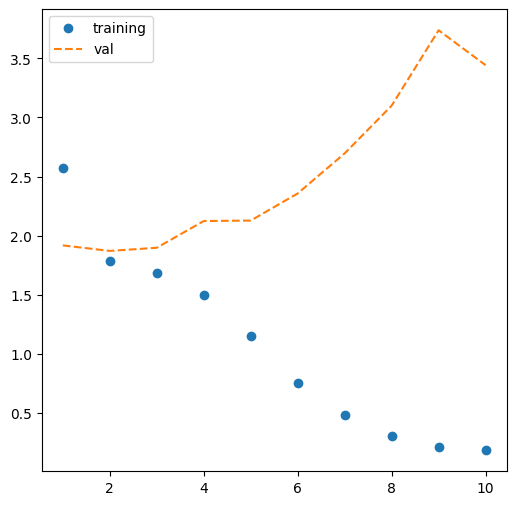

In [ ]:

modelb_dict = modelb0.history
loss_values = modelb_dict['loss']
val_loss_values = modelb_dict['val_loss']

fig = plt.figure(figsize=(6,6))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

#Modelo version 2

In [27]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical

# Definimos el tamaño de la imagen y la longitud de la secuencia
IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = 224, 224, 3
SEQUENCE_LENGTH = 4  # Longitud fija para las secuencias de imágenes


# Prepara los datos
imagenes = []
etiquetas = []

for study_id, imagenes_array in imagenes_por_study_id_ordenado.items():
    if study_id in df_diagnosis['study_id'].values:
        diagnostico = df_diagnosis[df_diagnosis['study_id'] == study_id]['Tipo'].values[0]

        # Padding: Asegurar que todas las secuencias tengan la misma longitud
        if len(imagenes_array) < SEQUENCE_LENGTH:
            # Añadir imágenes en blanco
            for _ in range(SEQUENCE_LENGTH - len(imagenes_array)):
                imagenes_array.append(np.zeros((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))
        # Truncar la secuencia si es más larga que la longitud fija
        imagenes_array = imagenes_array[:SEQUENCE_LENGTH]

        # Concatenar imágenes a lo largo de un nuevo eje
        imagenes_concatenadas = np.stack(imagenes_array, axis=0)
        imagenes.append(imagenes_concatenadas)
        etiquetas.append(diagnostico)

# Convertir listas a arrays de NumPy
imagenes = np.array(imagenes)
etiquetas = to_categorical(np.array(etiquetas))

print(imagenes.shape)  # Debe ser (número de estudios, SEQUENCE_LENGTH, altura, ancho, canales)


(491, 4, 224, 224, 3)


In [29]:
np.shape(etiquetas)[0]

491

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definir el modelo
model = Sequential()

# Capas convolucionales y de pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(491, 4, 224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Aplanar y capas densas
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(diagnostico_mapping), activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping y Reducción de la tasa de aprendizaje
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Entrenar el modelo
history = model.fit(
    imagenes, etiquetas,
    epochs=10,  # Reducir el número de épocas para un entrenamiento más rápido
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)







ValueError: Input 0 of layer "max_pooling2d_2" is incompatible with the layer: expected ndim=4, found ndim=6. Full shape received: (None, 491, 4, 222, 222, 32)

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(imagenes, etiquetas)
print(f'Loss: {loss}, Accuracy: {accuracy}')